# WINE DATASET GRAPH CLASSIFICATION
## AUTHOR: KANEEZ FATIMA



This project demonstrates how to combine **Graph Theory** with **Machine Learning** for classification tasks.  
We use the **Wine dataset** from scikit-learn, represent data points as nodes in a graph, and apply **K-Nearest Neighbors (KNN)** for classification.

## Features
- Load and explore the Wine dataset (scikit-learn).
- Build a graph with NetworkX where:
  - Each node = a wine sample.
  - Node attributes = features.
  - Edges = similarity between samples.
- Apply **KNN classifier** for prediction.
- Evaluate model accuracy.
- Visualize the graph with matplotlib.

## Requirements
Install the required libraries before running the notebook:

```bash
pip install matplotlib networkx numpy scikit-learn

In [2]:
#import libraries
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Step 1: Load the Iris dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Labels

In [4]:
# Step 2: Create a graph where each node represents a data point
G = nx.Graph()

# Add nodes to the graph with features as node attributes
for i in range(X.shape[0]):
    G.add_node(i, feature=X[i])

In [5]:
# Step 3: Create edges based on Euclidean distance (using a threshold for simplicity)
threshold = 0.50  # This is a simple threshold to add edges between close nodes
for i in range(X.shape[0]):
    for j in range(i + 1, X.shape[0]):
        distance = np.linalg.norm(X[i] - X[j])
        if distance < threshold:
            G.add_edge(i, j, weight=distance)

In [6]:
# Step 4: Prepare the data for classification (use the labels directly from the dataset)
# We will use KNN on the graph features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 5: Train a KNN classifier (you can also explore other graph-based classifiers)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Step 6: Predict and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN classifier on Wine dataset: {accuracy:.4f}")

Accuracy of KNN classifier on Wine dataset: 0.7407


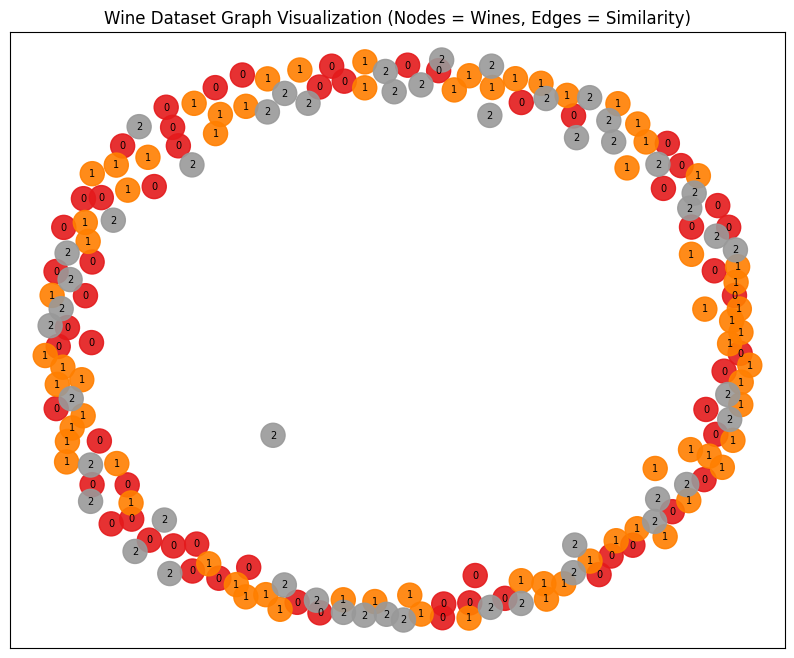

In [20]:
# Step 7: Visualization: Clusters + Labels
plt.figure(figsize=(10, 8))

# Define layout (spring layout looks nice for graphs)
pos = nx.spring_layout(G, seed=42)

# Draw nodes with color based on wine class
nx.draw_networkx_nodes(
    G, pos,
    node_color=y,          # Color by wine type (class labels)
    cmap=plt.cm.Set1,      # Colormap for distinct colors
    node_size=300,         # Node size
    alpha=0.9              # Slight transparency
)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw labels 
labels = {i: y[i] for i in range(len(y))}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=7, font_color="black")

# Add title
plt.title("Wine Dataset Graph Visualization (Nodes = Wines, Edges = Similarity)", fontsize=12)


# Show plot
plt.show()